In [38]:
import skimage as ski
import numpy as np
from skimage.util import invert
from skimage.color import rgb2gray
%matplotlib inline
import matplotlib.pyplot as plt
import os
filename = 'ATTA.png'
image = ski.io.imread(filename)
image = rgb2gray(image)
copied = image.copy()
for r in range(4096):
    for i in range(4096):
        a = round(image[r][i],2)
        if a > 0.6:
            copied[r][i]= 1
        else:
            copied[r][i] = 0
print(image)
print(copied)

[[0.78039216 0.78039216 0.77647059 ... 0.69803922 0.78823529 0.82745098]
 [0.77647059 0.77647059 0.77647059 ... 0.68235294 0.79607843 0.8745098 ]
 [0.78039216 0.78039216 0.77647059 ... 0.72156863 0.71764706 0.78823529]
 ...
 [0.77647059 0.77647059 0.77647059 ... 0.81960784 0.78431373 0.83137255]
 [0.77647059 0.77647059 0.77647059 ... 0.82745098 0.81176471 0.84313725]
 [0.77647059 0.77647059 0.78039216 ... 0.78823529 0.82352941 0.80392157]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


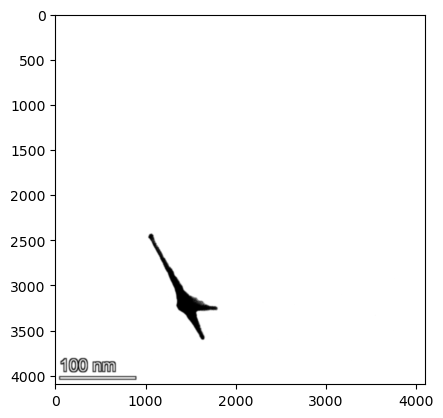

In [47]:
#matplotlib.pyplot.imshow(X, cmap='gray', norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
# image = copied
# for r in range(4096):
#     for c in range(4096):
#         rs = r - 2
#         cs = c - 2
#         count = 0
#         for i in range(5):
#             for j in range(5):
#                 r0 = rs + i
#                 c0 = cs + j
#                 if (r0>0 and r0< 4096 and c0 > 0 and c0<4096):
#                     if image[r0][c0]== 1:
#                         count+=1
#         if count> 15:
#             image[r][c] = 1        
for i in range(10):
    image = ski.filters.gaussian(image)
plt.imshow(image, cmap = 'gray')

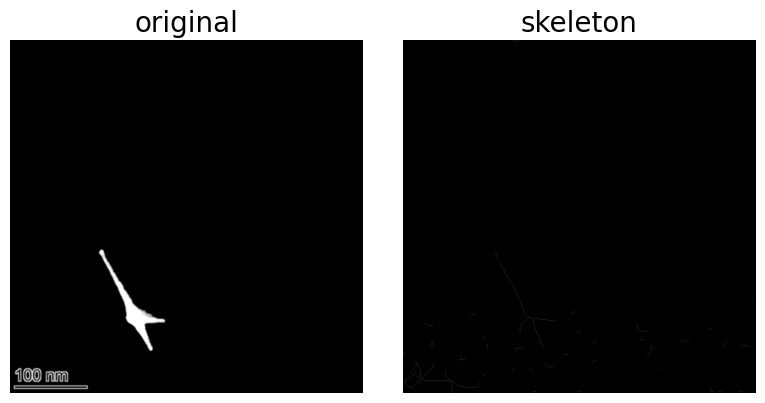

In [48]:
from skimage.morphology import skeletonize

# Invert the horse image
image = invert(image)

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

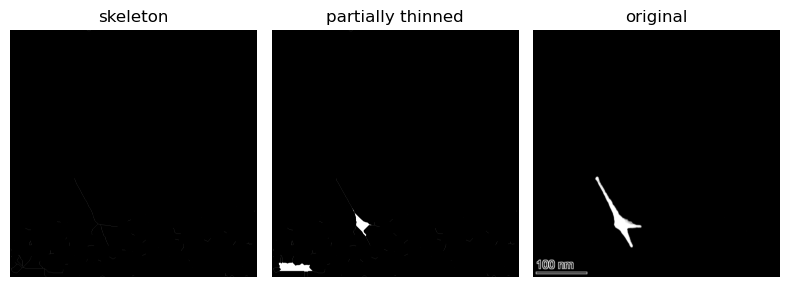

In [58]:
from skimage.morphology import skeletonize, thin

skeleton = skeletonize(image)
thinned_partial = thin(image, max_num_iter=90)

fig, axes = plt.subplots(1,3, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(skeleton, cmap=plt.cm.gray)
ax[0].set_title('skeleton')
ax[0].axis('off')

ax[1].imshow(thinned_partial, cmap=plt.cm.gray)
ax[1].set_title('partially thinned')
ax[1].axis('off')

ax[2].imshow(image, cmap=plt.cm.gray)
ax[2].set_title('original')
ax[2].axis('off')


fig.tight_layout()
plt.show()

In [59]:
from skimage.morphology import convex_hull_image
chull = convex_hull_image(thinned_partial)

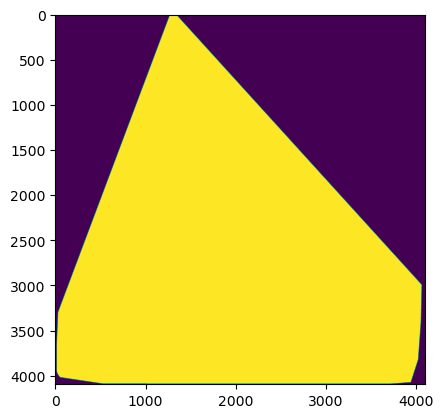

In [60]:
plt.imshow(chull)

In [61]:
image = skeleton
scaled_image = (image ^ np.min(image)) / (np.max(image) ^ np.min(image)) * 255
image_uint8 = scaled_image.astype(np.uint8)
ski.io.imsave('output1.png', image_uint8)

C:\Users\user\AppData\Local\Temp\ipykernel_9780\3580147035.py:4: UserWarning: output1.png is a low contrast image
  ski.io.imsave('output1.png', image_uint8)
